# Análises de Mídias Sociais - Spotify

In [1]:
!pip install -q spotipy

Acesse: https://beta.developer.spotify.com/dashboard/applications
para criar o Client_ID e o Client_Secret

In [2]:
import sys
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pprint
import pandas as pd

def login_spotify():
    client_id = "da1effa23714436a93368fff6f869de2"
    client_secret = "b81bb02ba7e3494bbd9d28489f5a7b7f"

    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    return sp

In [3]:
sp = login_spotify()
sp

## busca as músicas do artista

In [4]:
def search_musics_artist(sp,artist):

    results = sp.search(artist, limit=30)
    df = pd.DataFrame(columns=['artist','name', 'popularity', 'release_date'])
    for i, t in enumerate(results['tracks']['items']):
        df.loc[i] = [q, t['name'], t['popularity'], t['album']['release_date'] ]
        #print(' ', i, t['name'] , t['popularity'], t['album']['release_date']) # t['release_date']
    return df.sort_values('popularity', ascending=False), results

sp = login_spotify()
q='Anitta'
df, results = search_musics_artist(sp,q)
df[:15]

artist                                               name  popularity  \
2   Anitta                                            Alegría          78   
4   Anitta                                           Downtown          77   
1   Anitta                                           BELLAKEO          76   
25  Anitta                                            Alegría          75   
5   Anitta                                  Gata Only (Remix)          74   
3   Anitta                                           BELLAKEO          71   
0   Anitta                                           Envolver          68   
6   Anitta                                           Envolver          68   
12  Anitta                       Mi Amor (with JVKE & Anitta)          67   
10  Anitta                        Back for More (with Anitta)          67   
16  Anitta                                        Savage Funk          65   
7   Anitta  Vai malandra (feat. Tropkillaz & DJ Yuri Martins)          64   
29  Anitta           GET UP BITCH! shake ya ass (with Anitta)          63   
22  Anitta                                           Paradise          62   
13  Anitta                                               Grip          61   

   release_date  
2    2024-08-08  
4    2017-11-19  
1    2023-12-07  
25   2024-07-04  
5    2024-06-07  
3    2024-06-20  
0    2021-11-11  
6    2022-04-12  
12   2024-06-14  
10   2023-09-15  
16   2024-04-26  
7    2017-12-18  
29   2024-08-30  
22   2024-09-11  
13   2024-04-26

In [5]:
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Anitta&type=track&offset=0&limit=30',
  'items': [{'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7FNnA9vBm6EKceENgCGRMb'},
       'href': 'https://api.spotify.com/v1/artists/7FNnA9vBm6EKceENgCGRMb',
       'id': '7FNnA9vBm6EKceENgCGRMb',
       'name': 'Anitta',
       'type': 'artist',
       'uri': 'spotify:artist:7FNnA9vBm6EKceENgCGRMb'}],
     'available_markets': ['AR',
      'AU',
      'AT',
      'BE',
      'BO',
      'BR',
      'BG',
      'CA',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DK',
      'DO',
      'DE',
      'EC',
      'EE',
      'SV',
      'FI',
      'FR',
      'GR',
      'GT',
      'HN',
      'HK',
      'HU',
      'IS',
      'IE',
      'IT',
      'LV',
      'LT',
      'LU',
      'MY',
      'MT',
      'MX',
      'NL',
      'NZ',
      'NI',
      'NO',
      'PA',
      'PY',
      'PE',
 

In [6]:
artist = 'Anitta'
results = sp.search(artist, limit=30)

In [7]:
type(results)

dict

In [8]:
import json
with open('Anitta.json', 'w') as fp:
    json.dump(results, fp)

In [9]:
print(results)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Anitta&type=track&offset=0&limit=30', 'items': [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7FNnA9vBm6EKceENgCGRMb'}, 'href': 'https://api.spotify.com/v1/artists/7FNnA9vBm6EKceENgCGRMb', 'id': '7FNnA9vBm6EKceENgCGRMb', 'name': 'Anitta', 'type': 'artist', 'uri': 'spotify:artist:7FNnA9vBm6EKceENgCGRMb'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 

In [10]:
f = open('spotify-anitta.json', 'w')
f.write(str(results))

136064

In [11]:
!head spotify-anitta.json

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Anitta&type=track&offset=0&limit=30', 'items': [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7FNnA9vBm6EKceENgCGRMb'}, 'href': 'https://api.spotify.com/v1/artists/7FNnA9vBm6EKceENgCGRMb', 'id': '7FNnA9vBm6EKceENgCGRMb', 'name': 'Anitta', 'type': 'artist', 'uri': 'spotify:artist:7FNnA9vBm6EKceENgCGRMb'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 

In [12]:
#sp = login_spotify()
q='ludmilla'
df = search_musics_artist(sp,q)
df

(      artist                                               name  popularity  \
 1   ludmilla                                           Não Para          73   
 3   ludmilla                                       No_se_ve.mp3          71   
 10  ludmilla                                       Dia de Fluxo          71   
 13  ludmilla  Numanice Lud Session - Modo Avião / A Tua Voz ...          68   
 26  ludmilla             Ainda Gosto de Você / Já Era - Ao Vivo          68   
 19  ludmilla                                Maliciosa - Ao Vivo          67   
 23  ludmilla                             Falta de Mim - Ao Vivo          65   
 16  ludmilla  A boba fui eu - Recorded At Mosh Studios, São ...          65   
 28  ludmilla                                Maliciosa - Ao Vivo          64   
 25  ludmilla                                          Macetando          61   
 14  ludmilla                             Falta de Mim - Ao Vivo          60   
 24  ludmilla  Lud Session #4: Morrer de

In [13]:
len(df)

2

In [14]:
#sp = login_spotify()
q='Rihanna'
df = search_musics_artist(sp,q)
df[:15]

(     artist                                              name  popularity  \
 2   Rihanna                                 Love On The Brain          83   
 13  Rihanna                              Love The Way You Lie          83   
 5   Rihanna                          Only Girl (In The World)          82   
 8   Rihanna                                     We Found Love          82   
 10  Rihanna                                               S&M          81   
 7   Rihanna                                          Umbrella          81   
 4   Rihanna                                         Needed Me          81   
 24  Rihanna                              Don't Stop The Music          80   
 9   Rihanna                                         Disturbia          78   
 20  Rihanna                                     Pon de Replay          78   
 27  Rihanna                                    Kiss It Better          78   
 18  Rihanna                                       The Monster  

In [15]:
#sp = login_spotify()
q='Mariah Carey'
df = search_musics_artist(sp,q)
df[:10]

(          artist                                         name  popularity  \
 0   Mariah Carey              All I Want for Christmas Is You          74   
 4   Mariah Carey                                      Fantasy          74   
 6   Mariah Carey                            Always Be My Baby          72   
 5   Mariah Carey                                Touch My Body          71   
 15  Mariah Carey  I Know What You Want (feat. Flipmode Squad)          69   
 2   Mariah Carey                           We Belong Together          69   
 7   Mariah Carey                                         Hero          68   
 10  Mariah Carey                                  Without You          68   
 19  Mariah Carey                                      Bye Bye          67   
 9   Mariah Carey                                     Obsessed          67   
 13  Mariah Carey                                One Sweet Day          67   
 11  Mariah Carey                                       My All  

In [16]:
len(df)

2

In [17]:
#sp = login_spotify()
q='Paralamas'
df = search_musics_artist(sp,q)
df[:10]

(       artist                                               name  popularity  \
 1   Paralamas                               Aonde Quer Que Eu Vá          65   
 8   Paralamas                                   Vital E Sua Moto          55   
 9   Paralamas                              Cuide Bem Do Seu Amor          54   
 5   Paralamas                                    Ela Disse Adeus          53   
 11  Paralamas                              Tendo A Lua - Ao Vivo          53   
 10  Paralamas                            O Amor Não Sabe Esperar          50   
 14  Paralamas                            Caleidoscópio - Ao Vivo          48   
 17  Paralamas                                      La Bella Luna          48   
 2   Paralamas                                     Uma Brasileira          46   
 16  Paralamas                                   Lourinha Bombril          45   
 25  Paralamas                                  Seguindo Estrelas          43   
 19  Paralamas              

In [18]:
#sp = login_spotify()
q='Ivete Sangalo'
df = search_musics_artist(sp,q)
df[:15]

(           artist                                               name  \
 0   Ivete Sangalo                               Color Esperanza 2020   
 2   Ivete Sangalo                                          Macetando   
 8   Ivete Sangalo                             Seus Recados - Ao Vivo   
 15  Ivete Sangalo                 A Mais Pedida - Ao Vivo | Acústico   
 3   Ivete Sangalo                            Cria Da Ivete - Ao Vivo   
 9   Ivete Sangalo                              Quando A Chuva Passar   
 17  Ivete Sangalo  Não Chore Mais (No Woman No Cry) (feat. Armand...   
 4   Ivete Sangalo                    Se Eu Não Te Amasse Tanto Assim   
 7   Ivete Sangalo  Faraó Divindade Do Egito / Ladeira Do Pelô / D...   
 1   Ivete Sangalo                                        O Mundo Vai   
 21  Ivete Sangalo                                 Muito Obrigado Axé   
 19  Ivete Sangalo                             Você É Linda - Ao Vivo   
 10  Ivete Sangalo                                 

In [19]:
#sp = login_spotify()
q='Simone e Simaria'
df = search_musics_artist(sp,q)
df[:10]

(              artist                                       name  popularity  \
 2   Simone e Simaria                      Mulher Foda - Ao Vivo          78   
 17  Simone e Simaria                     Dois Tristes - Ao Vivo          72   
 20  Simone e Simaria                   Dois Fugitivos - Ao Vivo          68   
 3   Simone e Simaria                   Regime Fechado - Ao Vivo          62   
 5   Simone e Simaria  Raspão (feat. Simone & Simaria) - Ao Vivo          59   
 0   Simone e Simaria                           La Vida Continuó          54   
 4   Simone e Simaria                                 Foi Pá Pum          54   
 8   Simone e Simaria                          Vontade De Morder          54   
 18  Simone e Simaria                            Amiga - Ao Vivo          54   
 10  Simone e Simaria                                 Foi Pá Pum          51   
 28  Simone e Simaria                                 Folha Seca          51   
 24  Simone e Simaria               Quan

## Obter a musica mais popular de cada cantor/cantora

In [20]:
cantoras = ['Beyonce', 'Rihanna', 'Anitta', 'Ludmilla', 'Simone e Simaria', 'Ivete Sangalo', 'Claudia Leitte' ]
df = pd.DataFrame(columns=['artist','name', 'popularity', 'release_date'])
linha = 0
for artist in cantoras:
    popularidade = 0
    results = sp.search(artist, limit=30)
    for i, t in enumerate(results['tracks']['items']):
        if t['popularity'] > popularidade:
            musica_mais_popular = [artist, t['name'], t['popularity'], t['album']['release_date'] ]
            popularidade = t['popularity']
    df.loc[linha] = musica_mais_popular
    linha += 1   
df2 = df.sort_values('popularity', ascending=False)
df2

artist                                               name  \
1           Rihanna                                  Love On The Brain   
2            Anitta                                            Alegría   
4  Simone e Simaria                              Mulher Foda - Ao Vivo   
0           Beyonce                        Crazy In Love (feat. Jay-Z)   
3          Ludmilla                                           Não Para   
6    Claudia Leitte  We Are One (Ole Ola) [The Official 2014 FIFA W...   
5     Ivete Sangalo                               Color Esperanza 2020   

   popularity release_date  
1          83   2016-01-28  
2          78   2024-08-08  
4          78   2024-07-12  
0          77   2003-06-24  
3          73   2024-08-27  
6          69   2014-11-21  
5          66   2020-05-18

In [21]:
cantores = ['Jorge e Mateus', 'Luan Santana', 'Anitta', 'Gusttavo Lima', 
            'Simone e Simaria', 'Maiara e Maraisa', 'Wesley Safadão', 'Marília Mendonça' ]
df = pd.DataFrame(columns=['artist','name', 'popularity', 'release_date'])
linha = 0
for artist in cantores:
    popularidade = 0
    results = sp.search(artist, limit=30)
    for i, t in enumerate(results['tracks']['items']):
        if t['popularity'] > popularidade:
            musica_mais_popular = [artist, t['name'], t['popularity'], t['album']['release_date'] ]
            popularidade = t['popularity']
    df.loc[linha] = musica_mais_popular
    linha += 1   
df2 = df.sort_values('popularity', ascending=False)
df2

artist                                               name  \
0    Jorge e Mateus                                              Xonei   
1      Luan Santana                                    CLONE - Ao Vivo   
2            Anitta                                            Alegría   
3     Gusttavo Lima                       A Noite (La Notte) - Ao Vivo   
4  Simone e Simaria                              Mulher Foda - Ao Vivo   
5  Maiara e Maraisa  O Meu Coração Em Suas Mãos (Colgando en tu man...   
6    Wesley Safadão                             Bem-vinda ao Meu Mundo   
7  Marília Mendonça                              Experiência - Ao Vivo   

   popularity release_date  
0          82   2024-08-15  
1          80   2024-08-22  
2          78   2024-08-08  
3          78   2024-08-14  
4          78   2024-07-12  
5          78   2024-07-31  
6          72   2024-07-25  
7          71   2024-06-26

In [22]:
results['tracks']['items'] #['popularity']

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1yR65psqiazQpeM79CcGh8'},
     'href': 'https://api.spotify.com/v1/artists/1yR65psqiazQpeM79CcGh8',
     'id': '1yR65psqiazQpeM79CcGh8',
     'name': 'Marília Mendonça',
     'type': 'artist',
     'uri': 'spotify:artist:1yR65psqiazQpeM79CcGh8'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',
    'BR',
    'BG',
    'CA',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DK',
    'DO',
    'DE',
    'EC',
    'EE',
    'SV',
    'FI',
    'FR',
    'GR',
    'GT',
    'HN',
    'HK',
    'HU',
    'IS',
    'IE',
    'IT',
    'LV',
    'LT',
    'LU',
    'MY',
    'MT',
    'MX',
    'NL',
    'NZ',
    'NI',
    'NO',
    'PA',
    'PY',
    'PE',
    'PH',
    'PL',
    'PT',
    'SG',
    'SK',
    'ES',
    'SE',
    'CH',
    'TW',
    'TR',
    'UY',
    'US',
    'GB',
    'AD',
    'LI',
    'MC',
    'ID',
    'JP',
    'TH',
    'VN'

In [23]:
type(results['tracks'])

dict

In [24]:
import json

file = 'principais_cantores_2024.json'
with open(file, 'w') as fp:
    json.dump(results, fp)

In [25]:
!head principais_cantores_2024.json

{"tracks": {"href": "https://api.spotify.com/v1/search?query=Mar%C3%ADlia+Mendon%C3%A7a&type=track&offset=0&limit=30", "items": [{"album": {"album_type": "album", "artists": [{"external_urls": {"spotify": "https://open.spotify.com/artist/1yR65psqiazQpeM79CcGh8"}, "href": "https://api.spotify.com/v1/artists/1yR65psqiazQpeM79CcGh8", "id": "1yR65psqiazQpeM79CcGh8", "name": "Mar\u00edlia Mendon\u00e7a", "type": "artist", "uri": "spotify:artist:1yR65psqiazQpeM79CcGh8"}], "available_markets": ["AR", "AU", "AT", "BE", "BO", "BR", "BG", "CA", "CL", "CO", "CR", "CY", "CZ", "DK", "DO", "DE", "EC", "EE", "SV", "FI", "FR", "GR", "GT", "HN", "HK", "HU", "IS", "IE", "IT", "LV", "LT", "LU", "MY", "MT", "MX", "NL", "NZ", "NI", "NO", "PA", "PY", "PE", "PH", "PL", "PT", "SG", "SK", "ES", "SE", "CH", "TW", "TR", "UY", "US", "GB", "AD", "LI", "MC", "ID", "JP", "TH", "VN", "RO", "IL", "ZA", "SA", "AE", "BH", "QA", "OM", "KW", "EG", "MA", "DZ", "TN", "LB", "JO", "PS", "BY", "KZ", "MD", "UA", "AL", "BA", "HR

## plota num gráfico

/tmp/ipykernel_8402/4186523118.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='artist', x = 'popularity', data=df2, palette="Set3" )


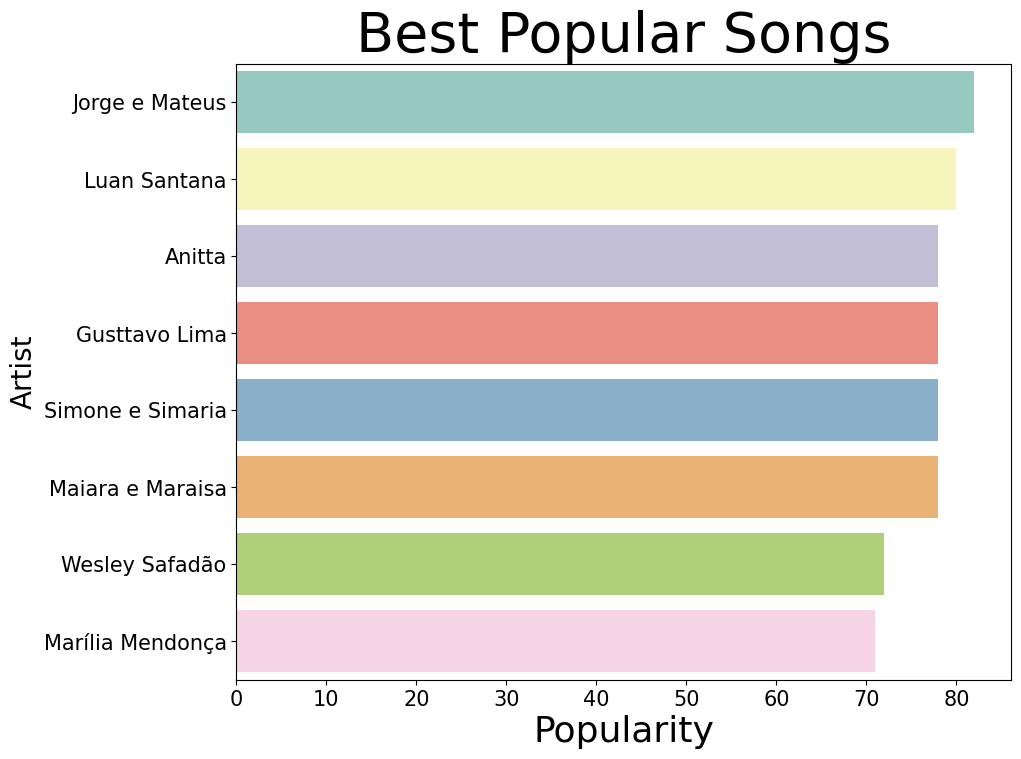

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,8))
fig.add_subplot(1,1,1)

ax = sns.barplot(y='artist', x = 'popularity', data=df2, palette="Set3" )

ax.axes.set_title("Best Popular Songs",fontsize=40)
ax.set_xlabel("Popularity",fontsize=26)
ax.set_ylabel("Artist",fontsize=20)
ax.tick_params(labelsize=15)
#sns.plt.show()
plt.show()

## Banda, Músicas

In [27]:
import spotipy
sp = login_spotify()

results = sp.search(q='coldplay', limit=20)
for i, t in enumerate(results['tracks']['items']):
    print (' ', i, t['name'])

  0 Viva La Vida
  1 Sparks
  2 Yellow
  3 Clocks
  4 The Scientist
  5 Something Just Like This
  6 A Sky Full of Stars
  7 Paradise
  8 Hymn for the Weekend
  9 Fix You
  10 ALL MY LOVE
  11 Don't Panic
  12 Trouble
  13 Adventure of a Lifetime
  14 Magic
  15 WE PRAY - Single Version
  16 Speed of Sound
  17 feelslikeimfallinginlove - Single Version
  18 MOON MUSiC
  19 In My Place


## Mostra todos os albuns de um cantor/cantora

In [28]:
import sys
import spotipy

''' shows the albums and tracks for a given artist.
'''

def get_artist(name):
    results = sp.search(q='artist:' + name, type='artist')
    items = results['artists']['items']
    if len(items) > 0:
        return items[0]
    else:
        return None

def show_artist_albums(artist):
    albums = []
    results = sp.artist_albums(artist['id'], album_type='album')
    albums.extend(results['items'])
    while results['next']:
        results = sp.next(results)
        albums.extend(results['items'])
    seen = set() # to avoid dups
    albums.sort(key=lambda album:album['name'].lower())
    for album in albums:
        name = album['name']
        if name not in seen:
            print((' ' + name))
            seen.add(name)

if __name__ == '__main__':
    sp = login_spotify()

    name = 'Beyonce'
    name = 'Simone e Simaria'
    name = 'coldplay'
    artist = get_artist(name)
    if artist:
        print('Albuns de: ', name)
        show_artist_albums(artist)
    else:
        print("Can't find that artist")

Albuns de:  coldplay
 A Head Full of Dreams
 A Rush of Blood to the Head
 Everyday Life
 Ghost Stories
 Ghost Stories Live 2014
 LeftRightLeftRightLeft (Live)
 Live 2003
 Live 2012
 Live in Buenos Aires
 Moon Music
 Moon Music (Full Moon Edition)
 Music Of The Spheres
 Mylo Xyloto
 Parachutes
 Viva La Vida (Prospekt's March Edition)
 Viva La Vida or Death and All His Friends
 X&Y


## Obtém informações do Artista

Artista:  Michael Jackson
Número de Seguidores:  32,902,483
Gênero:  ['r&b', 'soul']
Popularidade:  85
Spotify uri: spotify:artist:3fMbdgg4jU18AjLCKBhRSm
Spotify url: https://open.spotify.com/artist/3fMbdgg4jU18AjLCKBhRSm


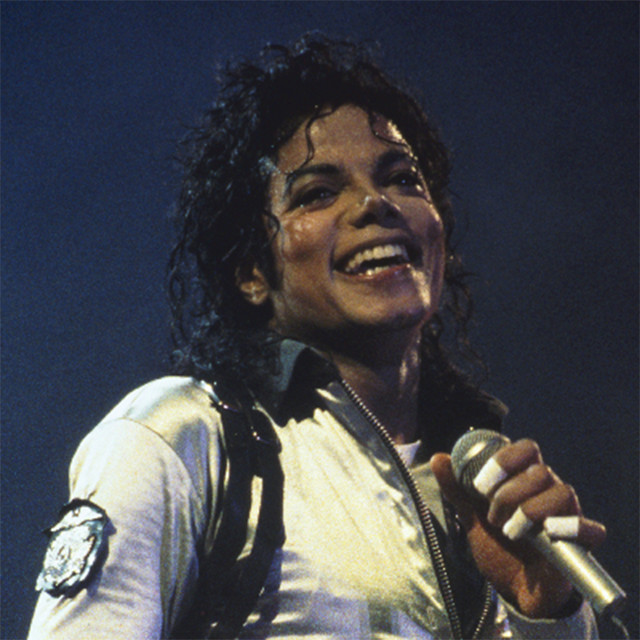

In [29]:
def obter_informacoes(nome_artista):
    from PIL import Image
    from urllib.request import urlopen
    artista = get_artist(nome_artista)
    seguidores = artista['followers']['total']
    genero = artista['genres']
    foto_url = artista['images'][0]['url']
    popularidade = artista['popularity']
    uri = artista['uri']
    url_spotify = artista['external_urls']['spotify']
    print('Artista: ', artista['name'])
    print('Número de Seguidores: ', '{:,d}'.format(seguidores))
    print('Gênero: ', genero)
    print('Popularidade: ', popularidade)
    print('Spotify uri:', uri)
    print('Spotify url:',url_spotify)
    foto = Image.open(urlopen(foto_url))
    return foto #seguidores, genero, popularidade, foto_url, uri, url_spotify

nome_artista = 'Beyonce'
nome_artista = name = 'Simone e Simaria'

nome_artista = 'Michael Jackson'
foto = obter_informacoes(nome_artista)
im = foto.convert("RGB")

display(im)

Artista:  Anitta
Número de Seguidores:  12,698,424
Gênero:  ['funk pop', 'funk rj', 'pagode baiano', 'pop', 'pop nacional']
Popularidade:  82
Spotify uri: spotify:artist:7FNnA9vBm6EKceENgCGRMb
Spotify url: https://open.spotify.com/artist/7FNnA9vBm6EKceENgCGRMb


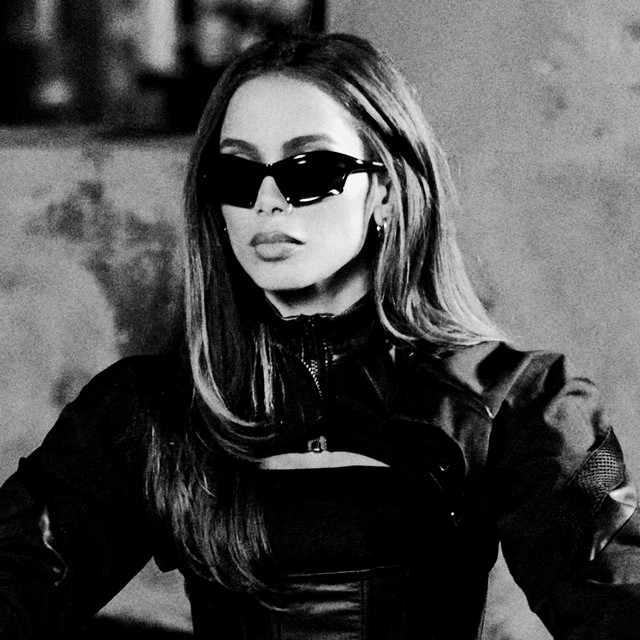

In [30]:
nome_artista = 'Anitta'
foto = obter_informacoes(nome_artista)
foto

Artista:  LUDMILLA
Número de Seguidores:  7,718,189
Gênero:  ['funk carioca', 'funk pop', 'funk rj', 'pagode baiano', 'pop nacional']
Popularidade:  78
Spotify uri: spotify:artist:3CDoRporvSjdzTrm99a3gi
Spotify url: https://open.spotify.com/artist/3CDoRporvSjdzTrm99a3gi


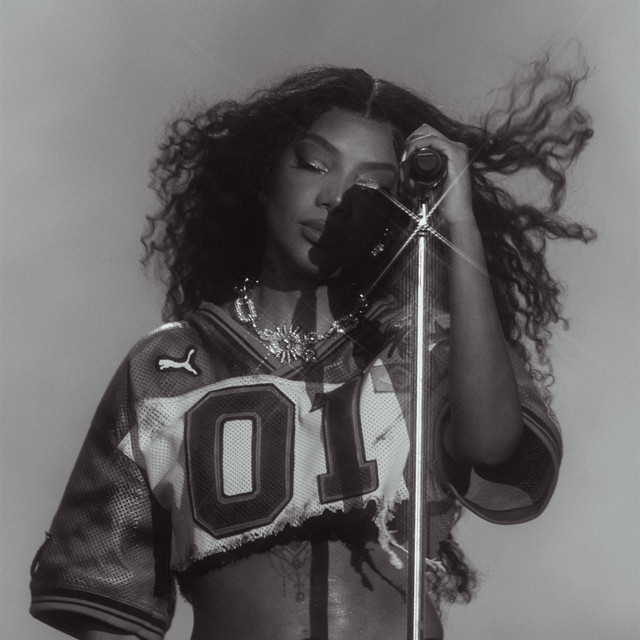

In [31]:
nome_artista = 'Ludmilla'
foto = obter_informacoes(nome_artista)
foto

Artista:  Katy Perry
Número de Seguidores:  34,678,855
Gênero:  ['pop']
Popularidade:  87
Spotify uri: spotify:artist:6jJ0s89eD6GaHleKKya26X
Spotify url: https://open.spotify.com/artist/6jJ0s89eD6GaHleKKya26X


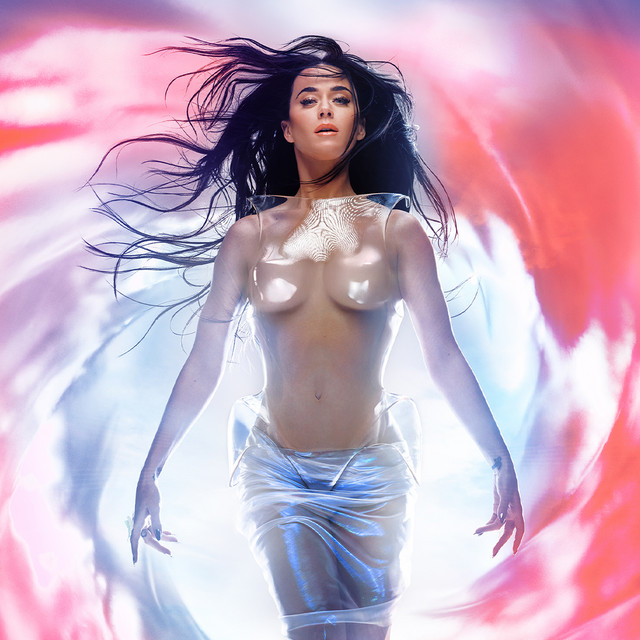

In [32]:
nome_artista = 'katy perry'
foto = obter_informacoes(nome_artista)
foto

Artista:  Lady Gaga
Número de Seguidores:  32,080,833
Gênero:  ['art pop', 'dance pop', 'pop']
Popularidade:  92
Spotify uri: spotify:artist:1HY2Jd0NmPuamShAr6KMms
Spotify url: https://open.spotify.com/artist/1HY2Jd0NmPuamShAr6KMms


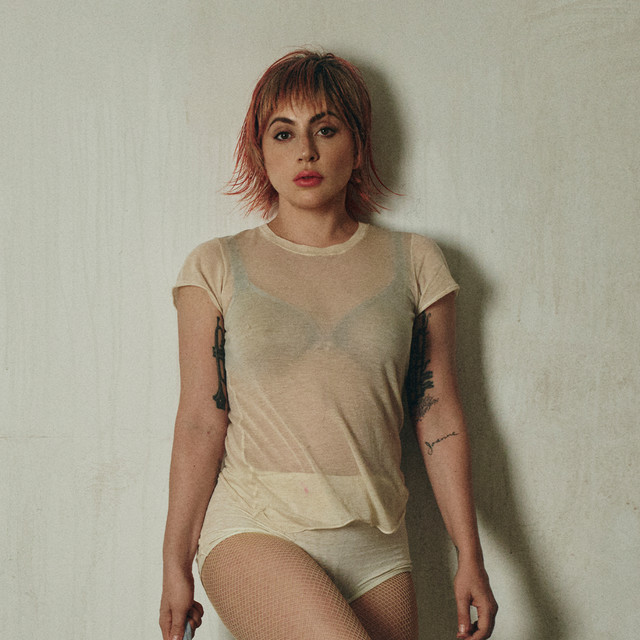

In [33]:
nome_artista = 'lady gaga'
foto = obter_informacoes(nome_artista)
foto

In [34]:
#!pip install pillow

Artista:  Michael Jackson
Número de Seguidores:  32,902,483
Gênero:  ['r&b', 'soul']
Popularidade:  85
Spotify uri: spotify:artist:3fMbdgg4jU18AjLCKBhRSm
Spotify url: https://open.spotify.com/artist/3fMbdgg4jU18AjLCKBhRSm


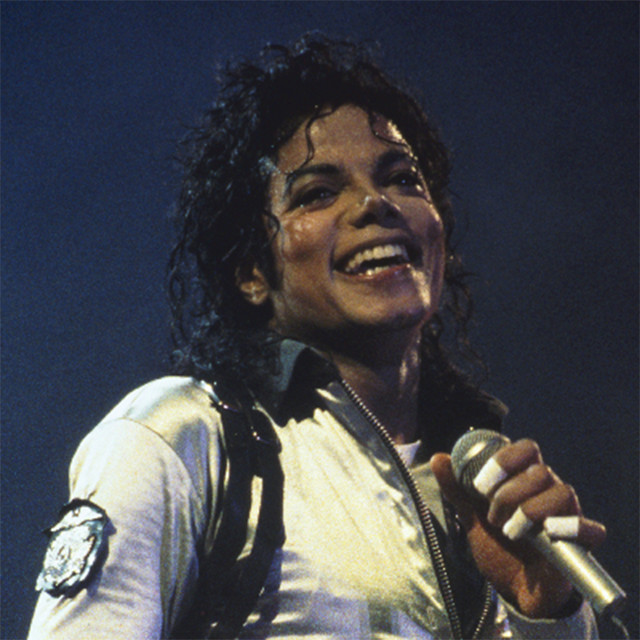

In [35]:
from IPython.display import display
from PIL import Image

nome_artista = 'michael jackson'
foto = obter_informacoes(nome_artista)
im = foto.convert("RGB")

display(im)